## General Feature Extraction
- File loading
- Word counts
- Character counts
- Average characters per word
- Stop words count
- Count # tags and @ mentions
- If numeric digits are present in tweets
- Upper case word count

## Processing & Cleaning
- Lower case
- Contraction to Expansion
- Email removal and counts
- URL removal and counts
- Removal of `RT`
- Removal of special character
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of stop words
- Conversion into base form of words
- Common occuring words removal
- Rare occuring word removal
- Word count
- Spelling correction
- Tokenization
- Lemmatization
- Detection entity using NER
- Noun detection
- Language detection
- Sentence translation
- Using inbuilt `Sentiment Classifier`

## Advance Text Processing & Feature Extraction
- N-Gram, Bi-Gram etc
- Bag of Words (BOW)
- Term frequency calculation `TF`
- Inverse document frequency `IDF`
- `TF-IDF` Term frequency - Inverse document frequency
- Word embedding `Word2Vec` using spacy

## Machine Learning Model for Text Classification
- SGDClassifier
- LogisticRegression
- LogisticRegressionCV
- LinearSVC
- RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
# Load a file
df = pd.read_csv('twitter_sentiment.csv', encoding = 'latin1', header = None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.shape

(1600000, 6)

In [6]:
df = df[[5, 0]]

In [7]:
df.head()

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [8]:
df.columns = ['tweets', 'sentiment']

In [9]:
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [10]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [11]:
sentiment_mapping = {0: 'negative', 4: 'positive'}

## WORD COUNTS

In [12]:
df['word_count'] = df['tweets'].apply(lambda x: len(str(x).split()))

In [13]:
df.head()

,tweets,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


## CHARACTER COUNTS

In [20]:
df['char_counts'] = df['tweets'].apply(lambda x: len(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df.head()

,tweets,sentiment,word_count,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


## AVERAGE WORD LENGTH

In [80]:
def get_avg_word_length(x):
    words = x.split()
    
    word_length = 0
    
    for word in words:
        word_length = word_length + len(word)
    
    return word_length / len(words)

In [81]:
df['avg_word_length'] = df['tweets'].apply(lambda x: get_avg_word_length(x))

In [82]:
df.head()

,tweets,sentiment,word_count,avg_word_length
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,5.052632
1,is upset that he can't update his Facebook by ...,0,21,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,3.944444
3,my whole body feels itchy and like its on fire,0,10,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,4.285714


## STOP WORDS COUNT

In [83]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [84]:
df['stop_word_lenth'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [85]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,4.285714,10


## COUNT # TAGS & @ MENTIONS

In [86]:
df['hasttag_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mention_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [87]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,4.285714,10,0,1


## IF NUMERIC DIGITS ARE PRESENT IN TWEETS

In [88]:
df['numeric_counts'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [89]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,4.285714,10,0,1,0


## UPPERCASE WORD COUNT

In [90]:
df['uppercase_count'] = df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(t) > 3]))

In [91]:
df.head(97)

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,5.052632,4,0,1,0,0
1,is upset that he can't update his Facebook by ...,0,21,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,3.944444,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,4.285714,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...
92,Poor cameron (the hills),0,4,5.250000,0,0,0,0,0
93,"pray for me please, the ex is threatening to s...",0,26,4.153846,12,0,0,0,0
94,"@makeherfamous hmm , do u really enjoy being ...",0,26,4.307692,12,0,1,0,0
95,Strider is a sick little puppy http://apps.fa...,0,7,11.142857,2,0,0,0,0


In [92]:
df.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

## PREPROCESSING & CLEANING

### LOWER CASE CONVERSION

In [93]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())

In [94]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,5.052632,4,0,1,0,0
1,is upset that he can't update his facebook by ...,0,21,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,3.944444,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,4.285714,10,0,1,0,0


### CONTRACTION TO EXPANSION

In [95]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i had",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
" u ": " you ",
" u": " you",
" ur ": " your ",
" ur": " your",
" n ": "and"
}

In [96]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        
        return x
    else:
        return x

In [97]:
a = "i'm good how about u?"
cont_to_exp(a)

'i am good how about you?'

In [98]:
df['tweets'] = df['tweets'].apply(lambda x: cont_to_exp(x))

In [99]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,5.052632,4,0,1,0,0
1,is youpset that he cannot youpdate his faceboo...,0,21,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,3.944444,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,4.285714,10,0,1,0,0


### COUNT AND REMOVE EMAILS

In [100]:
import re

In [101]:
email_re = r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)'

In [102]:
df['emails'] = df['tweets'].apply(lambda x: re.findall(email_re, x))

In [103]:
df['email_counts'] = df['emails'].apply(lambda x: len(x))

In [104]:
df[df['email_counts'] > 0]

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,4.150000,6,0,0,0,1,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,5.047619,10,0,1,0,0,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,5.785714,6,0,1,0,0,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,7.111111,2,0,1,0,0,[jill@q985fm.com],1


In [105]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub(email_re, '', x))

In [106]:
df[df['email_counts'] > 0]['tweets']

4054       i want a new laptop.  hp tx2000 is the bomb. :...
7917                                           who stole ?  
8496       @alexistehpom  really? did you send out all th...
10290      @laureystack awh...that is kinda sad  lol add ...
16413      @jilliancyork  got 2 bottom of it, human error...
                                 ...                        
1588338    @boudoirsextoys do not forget to shoot me an e...
1589132    hi there , anybody got a job for me  oil &amp;...
1590489    @clericaaron yes,  is a good start. but i thin...
1591675    @miss_ellen good morning!!!!   congrats!    se...
1599053    @thejoshlynn you are! btw send me an email. wa...
Name: tweets, Length: 587, dtype: object

### COUNT AND REMOVE URLS

In [107]:
url_re = r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
df['url_counts'] = df['tweets'].apply(lambda x: len(re.findall(url_re, x)))

In [108]:
df[df['url_counts'] > 0]

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts,url_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,5.052632,4,0,1,0,0,[],0,1
37,@missxu sorry! bed time came here (gmt+1) ht...,0,8,6.500000,1,0,1,0,1,[],0,1
50,broadband plan 'a massive broken promise' http...,0,15,7.600000,4,0,0,0,0,[],0,1
74,why will not you show my location?! http://t...,0,7,7.285714,3,0,0,0,0,[],0,1
95,strider is a sick little puppy http://apps.fa...,0,7,11.142857,2,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1599961,@crgrs359 skip the aquarium and check out thes...,4,14,5.571429,4,0,1,0,0,[],0,1
1599973,http://twitpic.com/7jp4n - omg! office space.....,4,9,6.333333,0,0,0,0,1,[],0,1
1599981,another commenting contest! [;: yay!!! http:/...,4,6,9.833333,0,0,0,0,0,[],0,1
1599985,"if your the lead singer in a band, beware fall...",4,19,6.315789,5,2,0,0,0,[],0,1


In [109]:
# remove url
df['tweets'] = df['tweets'].apply(lambda x: re.sub(url_re, '', x))

In [110]:
df[df['url_counts'] > 0]

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts,url_counts
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,5.052632,4,0,1,0,0,[],0,1
37,@missxu sorry! bed time came here (gmt+1),0,8,6.500000,1,0,1,0,1,[],0,1
50,broadband plan 'a massive broken promise' via...,0,15,7.600000,4,0,0,0,0,[],0,1
74,why will not you show my location?!,0,7,7.285714,3,0,0,0,0,[],0,1
95,strider is a sick little puppy,0,7,11.142857,2,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1599961,@crgrs359 skip the aquarium and check out thes...,4,14,5.571429,4,0,1,0,0,[],0,1
1599973,- omg! office space... i wanna steal it.,4,9,6.333333,0,0,0,0,1,[],0,1
1599981,another commenting contest! [;: yay!!!,4,6,9.833333,0,0,0,0,0,[],0,1
1599985,"if your the lead singer in a band, beware fall...",4,19,6.315789,5,2,0,0,0,[],0,1


In [111]:
df.loc[0]['tweets']

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

### REMOVE RT

In [112]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('RT', '', x))

### REMOVE SPECIAL CHARACTERS OR PUNCTUATION

In [113]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [114]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts,url_counts
0,switchfoot - awww that is a bummer you shoul...,0,19,5.052632,4,0,1,0,0,[],0,1
1,is youpset that he cannot youpdate his faceboo...,0,21,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,3.944444,7,0,1,0,0,[],0,0
3,my whole body feels itchy and like its on fire,0,10,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,4.285714,10,0,1,0,0,[],0,0


### REMOVE MULTIPLE SPACES

In [115]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.split()))

In [116]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts,url_counts
0,switchfoot - awww that is a bummer you shoulda...,0,19,5.052632,4,0,1,0,0,[],0,1
1,is youpset that he cannot youpdate his faceboo...,0,21,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,3.944444,7,0,1,0,0,[],0,0
3,my whole body feels itchy and like its on fire,0,10,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,4.285714,10,0,1,0,0,[],0,0


### REMOVE HTML TAGS

In [117]:
from bs4 import BeautifulSoup
import unicodedata

In [118]:
%%time
df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

Wall time: 13min 59s


### REMOVE ACCENTED CHARACTERS

In [119]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [120]:
df['tweets'] = df['tweets'].apply(lambda x: remove_accented_chars(x))

### SpaCy & NLP

#### REMOVE STOP WORDS

In [121]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

In [122]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts,url_counts
0,switchfoot - awww bummer shoulda got david car...,0,19,5.052632,4,0,1,0,0,[],0,1
1,youpset youpdate facebook texting cry result s...,0,21,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,3.944444,7,0,1,0,0,[],0,0
3,body feels itchy like fire,0,10,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,4.285714,10,0,1,0,0,[],0,0


In [123]:
df.loc[999]['tweets']

'kisluvkis oh sad poor boy'

#### CONVERT INTO BASE OR ROOT FORM OF WORD
`We are going to skip this because of time it will take to complete this process`

In [124]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        
        x_list.append(lemma)
    
    print(' '.join(x_list))

In [125]:
c = 'kenichan dived times ball managed save 50 rest'
make_to_base(c)

kenichan dive time ball manage save 50 rest


#### COMMON WORDS REMOVAL

In [126]:
# combine all tweets in a single text and calculate the word frequency
text = ' '.join(df['tweets'])
text = text.split()

In [112]:
comm_word_freq = pd.Series(text).value_counts()
comm_word_freq

good             89329
youp             86342
day              82238
like             77727
-                69655
                 ...  
coolerandless        1
haathe               1
vickyday             1
frenchs              1
xaviera              1
Length: 794102, dtype: int64

In [127]:
f20 = comm_word_freq[:20]

NameError: name 'comm_word_freq' is not defined

In [ ]:
# remove top 20 most recurring words
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [ ]:
df.head()

#### RARE WORDS REMOVAL

In [ ]:
rare20 = comm_word_freq[-20:]

In [ ]:
rare20

In [ ]:
rare_words = comm_word_freq[comm_word_freq.values == 1]

In [ ]:
rare_words

In [ ]:
## we can remove all the words that has frequency 1, hoever, it takes high computing power ##
## processing top 20 rare words for simplicity
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [ ]:
df.head()

#### WORD CLOUD VISUALIZATION

In [124]:
!pip install wordcloud

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
len(text)

10902822

In [129]:
wc_text = ' '.join(text[:20000]) # only taking 20,000 records for simplicity

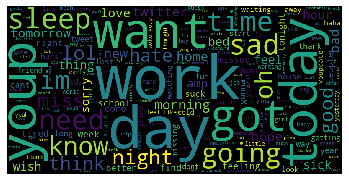

In [131]:
wc = WordCloud(width = 800, height = 400).generate(wc_text)
plt.imshow(wc)
plt.axis('off')
plt.show()

#### SPELLING CORRECTION

In [15]:
from textblob import TextBlob, Word

In [137]:
d = 'I m tring to lern NLP, it is veri intresting'

In [135]:
d = TextBlob(d).correct()
d

TextBlob("I m thing to learn NLP, it is very interesting")

#### TOKENIZATION

In [138]:
TextBlob(d).words

WordList(['I', 'm', 'tring', 'to', 'lern', 'NLP', 'it', 'is', 'veri', 'intresting'])

In [139]:
## using spacy
doc = nlp(d)

for token in doc:
    print(token)

I
m
tring
to
lern
NLP
,
it
is
veri
intresting


#### LEMMATIZATION

In [143]:
d = 'I am running the race. He has played the soccer tornament this morning and won.'

In [149]:
d
doc = nlp(d)

In [150]:
for token in doc:
    print(token.lemma_)

-PRON-
be
run
the
race
.
-PRON-
have
play
the
soccer
tornament
this
morning
and
win
.


#### DETECTING ENTITY USING NER (SpaCy)

In [151]:
e = 'Elon Musk, the CEO of SpaceX is plannig to mine the Mars for water and minerals for human survivals.'

In [152]:
doc = nlp(e)

In [154]:
for ent in doc.ents:
    print(f'{ent.text} - {ent.label_} - {str(spacy.explain(ent.label_))}')

Elon Musk - PERSON - People, including fictional
SpaceX - ORG - Companies, agencies, institutions, etc.
Mars - LOC - Non-GPE locations, mountain ranges, bodies of water


In [155]:
from spacy import displacy

In [156]:
displacy.render(doc, style='ent')

#### DETECTING NOUNS

In [157]:
for noun in doc.noun_chunks:
    print(noun)

Elon Musk
the CEO
SpaceX
plannig
the Mars
water
minerals
human survivals


#### TRANSLATION AND LANGUAGE DETECTION

In [160]:
tb = TextBlob(e)

In [161]:
tb.detect_language()

'en'

In [166]:
tb.translate(to='ne')

TextBlob("एलोन मस्क, स्पेसएक्सका सीईओ मानव बचेका लागि पानी र खनिजका लागि मंगल ग्रह खानीका लागि योजनाबद्ध छन्।")

#### USE INBUILT SENTIMENT CLASSIFIER

In [167]:
from textblob.sentiments import NaiveBayesAnalyzer

In [168]:
f = 'This is the time to be together and stay strong. Keep you and your family safe from violence.'

In [169]:
tb = TextBlob(f, analyzer=NaiveBayesAnalyzer())
tb.sentiment


**********************************************************************
  Resource movie_reviews not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('movie_reviews')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/movie_reviews

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


### ADVANCED TEXT PROCESSING

#### N-GRAMS

In [14]:
g = 'Thanks for watching'

In [16]:
tb = TextBlob(g)

In [19]:
tb.ngrams(3)

[WordList(['Thanks', 'for', 'watching'])]

#### BAG OF WORDS (BOW)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
h = ['this is first sentence', 'this is second', 'last']

In [22]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(h)

In [23]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [37]:
bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [38]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,0,1,0,0,0


#### TERM FREQUENCY
Term frequency is the ratio of the count of words present in sentence to the length of the sentence

In [39]:
bow.shape

(3, 6)

In [41]:
tf = bow.copy()

In [43]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col] / sum(row[1].values)

In [44]:
tf

,first,is,last,second,sentence,this
0,0.25,0.250000,0.0,0.000000,0.25,0.250000
1,0.00,0.333333,0.0,0.333333,0.00,0.333333
2,0.00,0.000000,1.0,0.000000,0.00,0.000000


#### INVERSE DOCUMENT FREQUENCY
` idf = log((1 + N) / (n + 1)) + 1`
N = total number of rows
n = number of rows the word is present

In [45]:
import numpy as np

In [47]:
i = pd.DataFrame(h, columns=['words'])

In [48]:
i

,words
0,this is first sentence
1,this is second
2,last


In [49]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,0,1,0,0,0


In [50]:
N = bow.shape[0]
N

3

In [51]:
## convert presense the word indicating True and False
i_bool = bow.astype('bool')

In [52]:
i_bool

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,False,True,False,False,False


In [53]:
i_bool['first'].sum()

1

In [56]:
cols = i_bool.columns

In [57]:
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [58]:
non_zero = []

for col in cols:
    non_zero.append(i_bool[col].sum())

In [59]:
non_zero

[1, 2, 1, 1, 1, 2]

In [60]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1) / (non_zero[index] + 1)) + 1)

In [61]:
idf

[1.6931471805599454,
 1.2876820724517808,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.2876820724517808]

#### TERM FREQUENCY INVERSE DOCUMENT FREQUENCY `TF-IDF`

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tfidf = TfidfVectorizer()

In [64]:
x_tfidf = tfidf.fit_transform(i['words'])

In [66]:
x_tfidf.toarray()

array([[0.5628291 , 0.42804604, 0.        , 0.        , 0.5628291 ,
        0.42804604],
       [0.        , 0.51785612, 0.        , 0.68091856, 0.        ,
        0.51785612],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [68]:
tfidf.idf_

array([1.69314718, 1.28768207, 1.69314718, 1.69314718, 1.69314718,
       1.28768207])

#### WORD EMBEDDINGS
`Word2Vec`

In [69]:
nlp = spacy.load('en_core_web_lg')

In [70]:
doc = nlp('You are welcome, thank you for asking. Dog cat lion.')

In [71]:
for token in doc:
    print(token.text, token.has_vector)

You True
are True
welcome True
, True
thank True
you True
for True
asking True
. True
Dog True
cat True
lion True
. True


In [73]:
nlp('animal').vector.shape

(300,)

In [74]:
## finding the similarity between words using vector
for t_one in doc:
    for t_two in doc:
        print(t_one.text, t_two.text, t_one.similarity(t_two))

You You 1.0
You are 0.5631888
You welcome 0.51274097
You , 0.35215598
You thank 0.5647585
You you 0.9999999
You for 0.494673
You asking 0.5765112
You . 0.38909933
You Dog 0.36494097
You cat 0.3080798
You lion 0.20392051
You . 0.38909933
are You 0.5631888
are are 1.0
are welcome 0.4314748
are , 0.3376042
are thank 0.28098884
are you 0.5631888
are for 0.45088002
are asking 0.35369515
are . 0.33142993
are Dog 0.25583652
are cat 0.20412527
are lion 0.14396745
are . 0.33142993
welcome You 0.51274097
welcome are 0.4314748
welcome welcome 1.0
welcome , 0.2791398
welcome thank 0.68441296
welcome you 0.51274097
welcome for 0.42021647
welcome asking 0.43354714
welcome . 0.32600883
welcome Dog 0.23176867
welcome cat 0.1786995
welcome lion 0.13807522
welcome . 0.32600883
, You 0.35215598
, are 0.3376042
, welcome 0.2791398
, , 1.0
, thank 0.27706432
, you 0.35215598
, for 0.2504841
, asking 0.21636184
, . 0.42152393
, Dog 0.15099345
, cat 0.13754757
, lion 0.094719
, . 0.42152393
thank You 0.56475

### MACHINE LEARNING MODELS

#### BOW

In [128]:
df.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts,url_counts
0,switchfoot - awww bummer shoulda got david car...,0,19,5.052632,4,0,1,0,0,[],0,1
1,youpset youpdate facebook texting cry result s...,0,21,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,3.944444,7,0,1,0,0,[],0,0
3,body feels itchy like fire,0,10,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,4.285714,10,0,1,0,0,[],0,0


In [129]:
df0 = df[df['sentiment'] == 0].sample(2000)
df4 = df[df['sentiment'] == 4].sample(2000)

In [130]:
dfr = df0.append(df4)

In [131]:
dfr.shape

(4000, 12)

In [132]:
dfr.head()

,tweets,sentiment,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,emails,email_counts,url_counts
680143,ugh script coverage brutalit hard things sound...,0,20,4.850000,10,0,0,0,0,[],0,0
608088,closetmastrbakr happened walk happened amp sucks,0,25,4.280000,14,0,1,0,0,[],0,0
781557,paid english pounds 4 dress ring accessorize m...,0,27,4.111111,8,0,1,2,0,[],0,0
459431,calling nightsummer school morning,0,8,5.375000,4,0,0,0,0,[],0,0
202865,considering nap ho,0,12,3.833333,9,0,0,0,0,[],0,0


In [163]:
dfr_feat = dfr.drop(labels=['tweets', 'sentiment', 'emails'], axis = 1).reset_index(drop = True)

In [164]:
dfr_feat.head()

,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,email_counts,url_counts
0,20,4.850000,10,0,0,0,0,0,0
1,25,4.280000,14,0,1,0,0,0,0
2,27,4.111111,8,0,1,2,0,0,0
3,8,5.375000,4,0,0,0,0,0,0
4,12,3.833333,9,0,0,0,0,0,0


In [139]:
y = dfr['sentiment']
y

680143     0
608088     0
781557     0
459431     0
202865     0
          ..
921535     4
1103272    4
1293346    4
1378357    4
1411647    4
Name: sentiment, Length: 4000, dtype: int64

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
cv = CountVectorizer()
text_count = cv.fit_transform(dfr['tweets'])

In [143]:
text_count.toarray().shape

(4000, 9806)

In [144]:
dfr_bow = pd.DataFrame(text_count.toarray(), columns = cv.get_feature_names())

In [146]:
dfr_bow.head()

,08,09,10,100,1000,1000th,100ftzombie,100th,1018,1030am,...,zombie,zombienicholas,zomgkris,zones,zoo,zori,zui,zumba,zundapp,zwitter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
dfr_bow.shape

(4000, 9806)

In [154]:
y.shape

(4000,)

In [147]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [148]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgr_cv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [149]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgr_cv, 'SVM': svm, 'RFC': rfc}

In [150]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [158]:
def classify(X, y):
    scalar = MinMaxScaler(feature_range=(0, 1))
    X = scalar.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f'{key} ---> {accuracy}')

In [159]:
%%time
classify(dfr_bow, y)

SGD ---> 0.6625
LGR ---> 0.68125
LGR-CV ---> 0.68375
SVM ---> 0.66
RFC ---> 0.68375
Wall time: 52.4 s


#### MANUAL FEATURES

In [160]:
%%time
classify(dfr_feat, y)

SGD ---> 0.59625
LGR ---> 0.59875
LGR-CV ---> 0.59625
SVM ---> 0.59625
RFC ---> 0.54
Wall time: 2.09 s


#### MANUAL FEATURES + BOW

In [165]:
X = dfr_feat.join(dfr_bow)

In [166]:
X

,word_count,avg_word_length,stop_word_lenth,hasttag_counts,mention_counts,numeric_counts,uppercase_count,email_counts,url_counts,08,...,zombie,zombienicholas,zomgkris,zones,zoo,zori,zui,zumba,zundapp,zwitter
0,20,4.850000,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,4.280000,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27,4.111111,8,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,5.375000,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,3.833333,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,11,3.363636,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,21,3.761905,11,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,13,7.153846,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3998,10,6.600000,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
%%time
classify(X, y)

SGD ---> 0.67125
LGR ---> 0.69375
LGR-CV ---> 0.68375
SVM ---> 0.6775
RFC ---> 0.6575
Wall time: 43.3 s


#### TF-IDF

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [169]:
dfr.shape

(4000, 12)

In [170]:
tfidf = TfidfVectorizer()

In [173]:
X = tfidf.fit_transform(dfr['tweets'])
X = pd.DataFrame(X.toarray())

In [174]:
%%time
classify(X, y)

SGD ---> 0.65
LGR ---> 0.68125
LGR-CV ---> 0.67875
SVM ---> 0.66125
RFC ---> 0.67875
Wall time: 47.4 s


#### Word2Vec

In [175]:
def get_vec(x):
    doc = nlp(x)
    
    return doc.vector.reshape(1, -1)

In [176]:
%%time
dfr['vec'] = dfr['tweets'].apply(lambda x: get_vec(x))

Wall time: 1min 2s


In [178]:
X = np.concatenate(dfr['vec'].to_numpy(), axis = 0)

In [180]:
X = pd.DataFrame(X)

In [181]:
%%time
classify(X, y)

SGD ---> 0.66
LGR ---> 0.745
LGR-CV ---> 0.74375


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM ---> 0.7275
RFC ---> 0.7075
Wall time: 9.95 s


#### PREDICTION

In [185]:
def predict_w_2_vec(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        
        print(f'{key} ---> {y_pred}')

In [187]:
predict_w_2_vec('Hello, I am glad you watched all the vidoe. Please ignore and do not hate it.')

SGD ---> [0]
LGR ---> [0]
LGR-CV ---> [0]
SVM ---> [0]
RFC ---> [0]


In [190]:
predict_w_2_vec('Disgusting')

SGD ---> [0]
LGR ---> [0]
LGR-CV ---> [0]
SVM ---> [0]
RFC ---> [0]
